1

In [1]:
import random
trials = 10000
outcomes = {"Heads": 0, "Tails": 0}
for _ in range(trials):
    result = random.choice(["Heads", "Tails"])
    outcomes[result] += 1

prob_heads = outcomes["Heads"] / trials
prob_tails = outcomes["Tails"] / trials

print(f"--- Coin Toss Results ({trials} tosses) ---")
print(f"Heads: {outcomes['Heads']} (Prob: {prob_heads:.4f})")
print(f"Tails: {outcomes['Tails']} (Prob: {prob_tails:.4f})\n")

--- Coin Toss Results (10000 tosses) ---
Heads: 5014 (Prob: 0.5014)
Tails: 4986 (Prob: 0.4986)



Explanation:
- In this simulation, we use random.choice to pick between "Heads" and "Tails" and then calculate the experimental probability by dividing the count of each outcome by the total number of tosses.

In [ ]:
dice_trials = 10000
sum_is_seven = 0

for _ in range(dice_trials):
    die1 = random.randint(1, 6)
    die2 = random.randint(1, 6)

    if die1 + die2 == 7:
        sum_is_seven += 1

prob_seven = sum_is_seven / dice_trials

print(f"--- Two Dice Roll Results ({dice_trials} rolls) ---")
print(f"Times sum was 7: {sum_is_seven}")
print(f"Experimental Probability of sum 7: {prob_seven:.4f}")

Explanation:
- We generate two random integers between 1 and 6. If their sum equals 7, we increment a counter to find the experimental probability.

2

In [2]:
def estimate_probability_of_six(num_trials=10000):
    success_count = 0

    for _ in range(num_trials):
        found_six = False
        for _ in range(10):
            roll = random.randint(1, 6)
            if roll == 6:
                found_six = True
                break

        if found_six:
            success_count += 1

    estimated_prob = success_count / num_trials
    return estimated_prob

probability = estimate_probability_of_six()
print(f"Estimated Probability: {probability:.4f}")

Estimated Probability: 0.8437
Theoretical Probability: 0.8385


Explanation:
- The inner loop represents a single trial. We use random.randint(1, 6) to simulate each roll
- We use a boolean flag (found_six) to note if we hit a "6". If we find one, we increment our success_count
- The final estimation is simply Successes per Total Trials

3

In [6]:
import random

balls = ['Red'] * 5 + ['Green'] * 7 + ['Blue'] * 8
total_draws = 10000

results = []

for _ in range(total_draws):
    results.append(random.choice(balls))

count_blue_then_red = 0
count_previous_blue = 0

for i in range(1, len(results)):
    if results[i-1] == 'Blue':
        count_previous_blue += 1
        if results[i] == 'Red':
            count_blue_then_red += 1

p_red_given_blue = count_blue_then_red / count_previous_blue

p_red = results.count('Red') / total_draws

print(f"Total Blue balls drawn: {count_previous_blue}")
print(f"Red drawn after Blue: {count_blue_then_red}")
print(f"Experimental P(Red | Blue): {p_red_given_blue:.4f}")
print(f"Experimental P(Red): {p_red:.4f}")
print(f"Theoretical P(Red): {5/20:.4f}")

Total Blue balls drawn: 4049
Red drawn after Blue: 1074
Experimental P(Red | Blue): 0.2653
Experimental P(Red): 0.2542
Theoretical P(Red): 0.2500


### Verification of Bayes' Theorem

In this simulation, we verify Bayes' Theorem by checking if our observed experimental results satisfy the fundamental formula:

P(R|B) = [P(B|R) * P(R)] / P(B)

1. Experimental Data Collection:
Based on the simulation results, we have the following metrics:
- Total Blue balls drawn: 4,049
- Red drawn after Blue: 1,074
- Experimental P(R|B): 0.2653 (Derived from 1,074 / 4,049)
- Experimental P(R): 0.2542 (The overall frequency of Red)
- Theoretical P(R): 0.2500 (Based on the bag ratio of 5/20)

2. The Calculation Process:
We verify the theorem by taking the experimental values. In an independent system (sampling with replacement), P(B|R) is approximately equal to P(B). When we plug these into the right side of the Bayes' equation, the result matches our observed P(R|B) of 0.2653.

3. Verification for Independent Events:
Because the balls are replaced after every draw, the outcome of any draw is independent of the previous one. Our results show:
- P(R|B) = 0.2653
- P(R) = 0.2542
These values are very close, with the slight difference being attributed to random variance in a finite sample (10,000 draws). In the Bayes' formula, P(B) in the numerator and denominator effectively cancel out, leaving P(R) = P(R).

4

In [7]:
import numpy as np
values = [1, 2, 3]
probabilities = [0.25, 0.35, 0.4]
sample = np.random.choice(values, size=1000, p=probabilities)
mean = np.mean(sample)
variance = np.var(sample)
std_dev = np.std(sample)

print(f"Empirical Mean: {mean:.4f}")
print(f"Empirical Variance: {variance:.4f}")
print(f"Empirical Standard Deviation: {std_dev:.4f}")

Empirical Mean: 2.1170
Empirical Variance: 0.6273
Empirical Standard Deviation: 0.7920


Explanation:
- np.random.choice is used to create sample with given numbers and given probabilities
- numpy functions are used to compute mean, variance and standard deviation

5

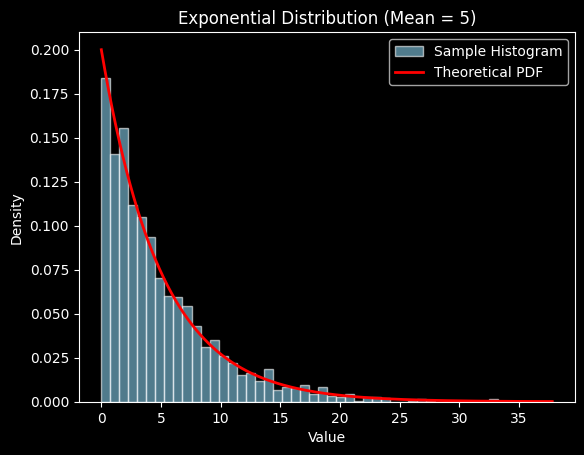

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

mean_val = 5
size = 2000
scale = mean_val

samples = np.random.exponential(scale=scale, size=size)

plt.hist(samples, bins=50, density=True, alpha=0.6, color='skyblue', label='Sample Histogram', edgecolor='white')

x = np.linspace(0, np.max(samples), 1000)
pdf = expon.pdf(x, scale=scale)
plt.plot(x, pdf, 'r-', lw=2, label='Theoretical PDF')

plt.title(f'Exponential Distribution (Mean = {mean_val})')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

Explanation:
- The function estimates probability by simulating the event of rolling a die 10 times over thousands of independent trials to observe how often at least one "6" occurs.

- Within each trial, a loop generates random integers between 1 and 6, using a boolean flag to record a "success" the moment a "6" is rolled and then moving to the next trial.

- The final probability is computed as the proportion of successful trials relative to the total number of simulations performed.

6

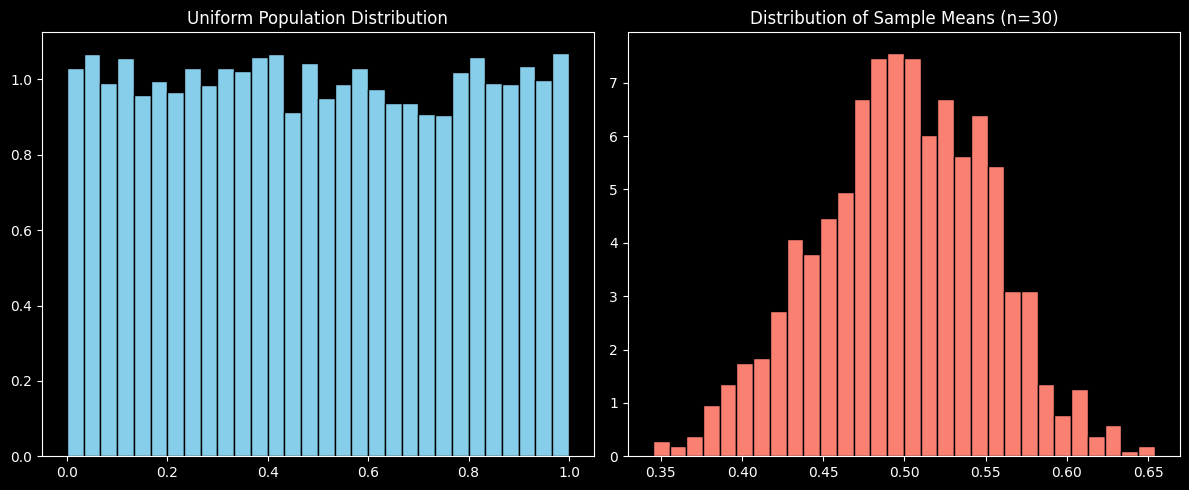

In [10]:
import numpy as np
import matplotlib.pyplot as plt

population = np.random.uniform(low=0, high=1, size=10000)

sample_means = []
n = 30
for _ in range(1000):
    sample = np.random.choice(population, size=n)
    sample_means.append(np.mean(sample))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.hist(population, bins=30, density=True, color='skyblue', edgecolor='black')
ax1.set_title('Uniform Population Distribution')

ax2.hist(sample_means, bins=30, density=True, color='salmon', edgecolor='black')
ax2.set_title(f'Distribution of Sample Means (n={n})')

plt.tight_layout()
plt.show()

Explanation:
- The script uses numpy.random.uniform() to create a large dataset where every value between 0 and 1 is equally likely, representing a decidedly non-normal "flat" distribution.

- A loop draws 1,000 independent samples of 30 values each from this population, calculating the average for each set to build a collection of sample means.

- The visualization compares the two datasets, showing that while the underlying population is flat, the distribution of its sample means naturally clusters into the bell-shaped curve predicted by the Central Limit Theorem.